<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Jun_ML_Classification_HW_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [ ]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [ ]:
iris_dataset = load_iris()
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [ ]:
import numpy as np

In [ ]:
iris_dataset_1 = np.delete(np.array(iris_dataset.data), 1, axis=1)   # sepal length, petal length, petal width
iris_dataset_2 = np.delete(np.array(iris_dataset.data), 0, axis=1)   # sepal width, petal length, petal width

In [ ]:
iris_dataset_1[:5]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

In [ ]:
iris_dataset_2[:5]

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2]])

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [ ]:
# если работаете в интерактивной оболочке IPython 
% matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

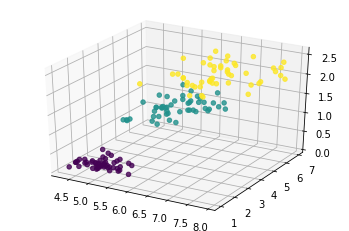

In [ ]:
ax = plt.axes(projection='3d')
### YOUR CODE HERE ###
ax.scatter3D(iris_dataset_1[:,0], iris_dataset_1[:,1], iris_dataset_1[:,2], 
             alpha=.8, c=iris_dataset.target)
plt.show()

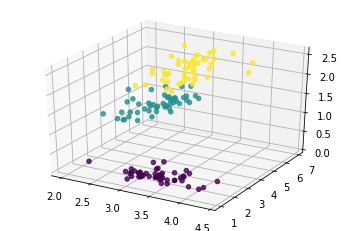

In [ ]:
ax = plt.axes(projection='3d')
### YOUR CODE HERE ###
ax.scatter3D(iris_dataset_2[:,0], iris_dataset_2[:,1], iris_dataset_2[:,2], 
             alpha=.8, c=iris_dataset.target)
plt.show()

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, 
                                                            iris_dataset.target, 
                                                            random_state=17)


x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, 
                                                            iris_dataset.target, 
                                                            random_state=17)


# проверим размерности получившегося разбиения
print(x_train_1.shape, x_test_1.shape, y_train_1.shape, y_test_1.shape)
print(x_train_2.shape, x_test_2.shape, y_train_2.shape, y_test_2.shape)

(112, 3) (38, 3) (112,) (38,)
(112, 3) (38, 3) (112,) (38,)


In [ ]:
model_1 = KNeighborsClassifier(n_neighbors=5).fit(x_train_1, y_train_1)
model_2 = KNeighborsClassifier(n_neighbors=5).fit(x_train_2, y_train_2)
model_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_1 = accuracy_score(y_test_1, model_1.predict(x_test_1))
accuracy_2 = accuracy_score(y_test_2, model_2.predict(x_test_1))

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9736842105263158, accuracy_2: 0.9736842105263158


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [ ]:
### YOUR CODE HERE ###
max_accuracy_score = -np.inf
current_n_neighbors = 1
for neighbors in range(1, 21):
  model_1 = KNeighborsClassifier(n_neighbors=neighbors).fit(x_train_1, y_train_1)
  accuracy_1 = accuracy_score(y_test_1, model_1.predict(x_test_1))
  print(f"accuracy_score = {accuracy_1}, n_neighbors = {neighbors}")
  if accuracy_1 > max_accuracy_score:
    max_accuracy_score = accuracy_1
    current_n_neighbors = neighbors

print('-'*25, 'result', '-'*25)
print(f"max_accuracy_score = {max_accuracy_score},",
      f"current_n_neighbors = {current_n_neighbors}")


accuracy_score = 0.9736842105263158, n_neighbors = 1
accuracy_score = 0.9736842105263158, n_neighbors = 2
accuracy_score = 0.9736842105263158, n_neighbors = 3
accuracy_score = 0.9473684210526315, n_neighbors = 4
accuracy_score = 0.9736842105263158, n_neighbors = 5
accuracy_score = 0.9473684210526315, n_neighbors = 6
accuracy_score = 0.9473684210526315, n_neighbors = 7
accuracy_score = 0.9210526315789473, n_neighbors = 8
accuracy_score = 0.9473684210526315, n_neighbors = 9
accuracy_score = 0.9473684210526315, n_neighbors = 10
accuracy_score = 0.9736842105263158, n_neighbors = 11
accuracy_score = 0.9210526315789473, n_neighbors = 12
accuracy_score = 0.9473684210526315, n_neighbors = 13
accuracy_score = 0.9210526315789473, n_neighbors = 14
accuracy_score = 0.9736842105263158, n_neighbors = 15
accuracy_score = 0.9473684210526315, n_neighbors = 16
accuracy_score = 0.9473684210526315, n_neighbors = 17
accuracy_score = 0.9210526315789473, n_neighbors = 18
accuracy_score = 0.9210526315789473, 